In [13]:
%matplotlib inline
import os,sys
import numpy as np
import math 
import matplotlib.pyplot as plt

In [14]:
def linear_interp(x, y, n):
    x_s, x_e = x[0], x[-1]
    x_int = np.linspace(x_s, x_e, n)
    y_int = np.empty(n)
    
    j = 0
    for i in range(len(x) - 1):
        while x_int[j] < x[i + 1]:
            y_int[j] = y[i] + (y[i + 1] - y[i])/(x[i + 1] - x[i])*(x_int[j] - x[i])
            j += 1
    y_int[-1] = y[-1]       
    return x_int, y_int
    

In [15]:
def toMach(u, T):
    return u/(k*T)**0.5

In [16]:
class Pipe_Param():
    def __init__(self, x, y, p0, T0):
        self.x = x
        self.y = y
        self.u = np.zeros_like(x)
        self.p = np.zeros_like(x)
        self.T = np.zeros_like(x)
        self.ro = np.zeros_like(x)
        self.M = np.zeros_like(x)
        
        for i in range(len(self.x)):
            self.u[i][0] = (k*T0)**0.5
            self.p[i][0] = p0*p_atm
            self.T[i][0] = T0
            self.ro[i][0] = p0/(R*T0)
            self.M[i][0] = 1.01
            
    def calculate(self):
        for i in range(1, len(self.x[0])):
            for j in range(len(self.x)):
                
                self.u[j][i] = self.u[j][i - 1]*(1 - (self.y[-1][i] - self.y[-1][i - 1])/((1 - self.M[j][i - 1]**2)*self.y[-1][i - 1]))

                
                self.p[j][i] = self.p[j][i - 1]*(1 + cap*self.M[j][i - 1]**2*(self.y[-1][i] - self.y[-1][i - 1])/((1 - self.M[j][i - 1]**2)*self.y[-1][i - 1]))

                
                self.T[j][i] = self.T[j][i - 1]*(1 + (cap - 1)*self.M[j][i - 1]**2*(self.y[-1][i] - self.y[-1][i - 1])/((1 - self.M[j][i - 1]**2)*self.y[-1][i - 1]))

                
                self.ro[j][i] = self.ro[j][i - 1]*(1 + self.M[j][i - 1]**2*(self.y[-1][i] - self.y[-1][i - 1])/((1 - self.M[j][i - 1]**2)*self.y[-1][i - 1]))

                
                self.M[j][i] = toMach(self.u[j][i], self.T[j][i])

In [17]:
pipe_x = np.empty(0)
pipe_y = np.empty(0)

fl = open(r"C:\Users\alexk\JupyterWorks\Xfiles\wall_new.txt", "r") 
for line in fl:
    tmp = line.split(" ")
    pipe_x = np.concatenate( ( pipe_x, [float(tmp[0])] ) , axis=0)
    pipe_y = np.concatenate( ( pipe_y, [float(tmp[1])] ) , axis=0)

fl.close()

In [18]:
N_x = 5000
N_y = 200

y_start, y_end = -1, 1
y = np.linspace(y_start, y_end, N_y)
x_int, y_int = linear_interp(pipe_x, pipe_y, N_x)
X, Y = np.meshgrid(x_int, y) 
Y = Y*y_int

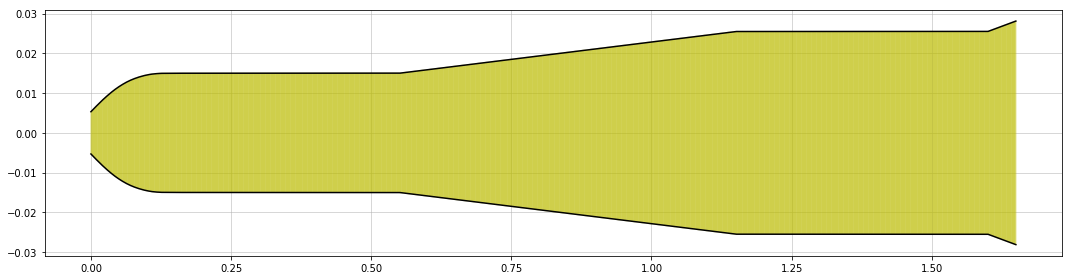

In [19]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
#ax.set(xlim=(0,0.25), ylim=(0, 0.02))
linestyles = ['-', '--', '-.']
grlinecolors = ['#000000', '#555555', '#aaaaaa']
linecolors = ['#000000', '#3163e1', '#ff9b2f']

ax.plot(X, Y, lw=0.2, color='y')
ax.plot(x_int, y_int, lw=1.5, color='k')
ax.plot(x_int, -y_int, lw=1.5, color='k')

#ax.axis('equal')
plt.grid(True,linewidth=0.5)
plt.tight_layout()
plt.show()
fig.savefig('pipe.png', dpi = 500)

In [20]:
p_atm = 101325
k = 373.1
cap = 1.3
R = 287.0

p0 = 14.8
T0 = 1650

pipe = Pipe_Param(X, Y, p0, T0)

In [21]:
pipe.calculate()

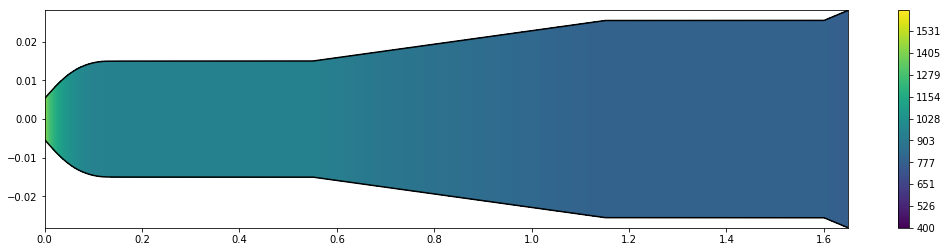

In [22]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111)

contf = plt.contourf(pipe.x, pipe.y, pipe.T, levels = np.linspace(400, T0, 200))
ax.plot(x_int, y_int, lw=1.5, color='k')
ax.plot(x_int, -y_int, lw=1.5, color='k')

cbar = plt.colorbar(contf)

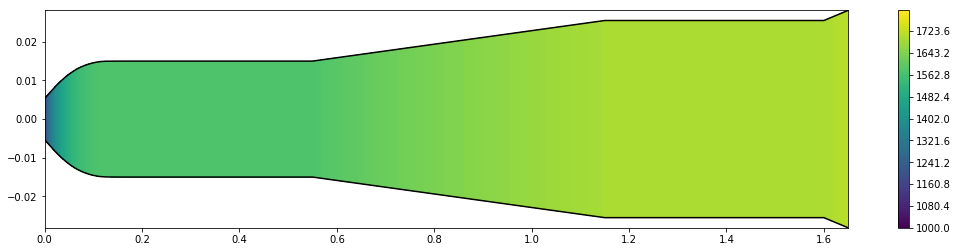

In [23]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot(111)

contf = plt.contourf(X, Y, pipe.u, levels = np.linspace(1000, 1800, 200))
ax.plot(pipe_x, pipe_y, lw=1.5, color='k')
ax.plot(pipe_x, -pipe_y, lw=1.5, color='k')

cbar = plt.colorbar(contf)